# Poisson Distribution -- an intuitive intro

Suppose we are watching the sky and can detect whenever a photon arrives. Over a long period of time $T$, we expect to observe some large number of photons $N$. Suppose there are many different sources of photons, so that the probability of detecting one photon can be considered effectively independent of detecting any other photon. Let's assume that for each photon the probability of being found is also uniform in time. 

We can think of a "photon density" per time $\lambda = N / T$. That is, in a short time $\Delta t$, we will have roughly $\lambda \Delta t$ photons. 

In [19]:
import numpy.random as rd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
N = 1000 ## total photons
T = 100 ## total time
dt = 1 ## interval we look over

trials = 1000 ## The number of times to run the experiment.

In [28]:
def experiment(N,T,dt):
    count = 0
    for i in range(N):
        if T * rd.uniform() < dt:
            count += 1
    return count

In [29]:
vals = []
for i in range(trials):
    vals.append(experiment(N,T,dt))

(array([   1.,    8.,   13.,   43.,   68.,   83.,  112.,  128.,  110.,
         101.,  109.,   86.,   52.,   43.,   22.,   10.,    4.,    3.,
           2.,    2.]),
 array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.]),
 <a list of 20 Patch objects>)

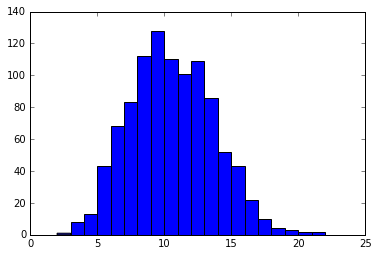

In [66]:
plt.hist(vals,bins=20)

In the limit of making $N$ and $T$ large but holding their ratio constant, we will attain the true Poisson distribution. How close is this distribution to the 'true' Poisson distribution?

In [76]:
lambd = N / T

In [77]:
vals_poisson = []
for i in range(trials):
    vals_poisson.append(rd.poisson(lambd))

(array([   3.,    8.,   16.,   28.,   63.,   97.,  106.,  126.,  132.,
         123.,  101.,   67.,   58.,   31.,   18.,    6.,    9.,    2.,
           3.,    3.]),
 array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.]),
 <a list of 20 Patch objects>)

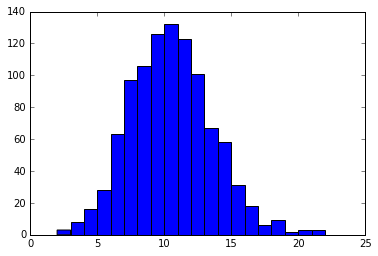

In [78]:
plt.hist(vals_poisson,bins=20)

We see that the two distributions above look quite similar. How similar are they really? Let's start by computing their means and standard deviations.

In [79]:
ave = np.average(vals)
std = np.std(vals)

ave_poisson = np.average(vals_poisson)
std_poisson = np.std(vals_poisson)

In [80]:
print "                    average    standard deviation"
print "our distribution    " + str(ave) + "      " + str(std)
print "True Poisson        " + str(ave_poisson) + "      " + str(std_poisson)

                    average    standard deviation
our distribution    10.074      3.14142069771
True Poisson        10.021      3.08424366742


That's pretty close! We notice how the average is around 10 (which is what we would expect). If we increased the number of trials, the average we find will get closer and closer to 10. 

The standard deviations are pretty close as well. Notice another interesting observation, the average is roughly the square of the standard deviation (i.e. the variance of each distribution). This is actually a property of the Poisson distribution! To see this, let's run a few more experiments. This time, for each distribution, we will keep track of each count for the possible outcomes.

In [171]:
lambds = [2.5,5.,7.5,10.,12.5,15.,17.5]
Poisson_count={}
averages = {}
variances = {}

In [172]:
for lambd in lambds:
    for i in range(trials):
        val = rd.poisson(lambd)
        if (lambd,val) in Poisson_count:
            Poisson_count[lambd,val] += 1
        else:
            Poisson_count[lambd,val] = 1

In [173]:
def weighted_ave_and_var(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, variance)

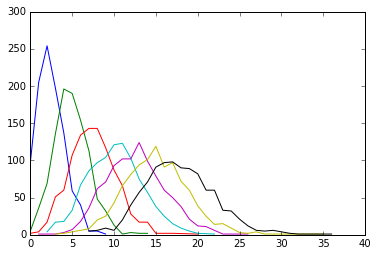

In [174]:
for lambd in lambds:
    x = [key[1] for key in Poisson_count if key[0] == lambd]
    x.sort()
    y = [Poisson_count[lambd,val] for val in x]
    plt.plot(x,y)
    averages[lambd],variances[lambd] = weighted_ave_and_var(x,y)

In [199]:
print '{:>0}  {:>10}  {:>11}'.format('lambda','averages','variances')
for lambd in lambds:
    print '{:>0}  {:>12}  {:>11}'.format(str(lambd), str(averages[lambd]), str(variances[lambd]))


lambda    averages    variances
2.5         2.471     2.641159
5.0         4.934     4.405644
7.5         7.475     7.613375
10.0        10.128    10.915616
12.5        12.599    12.758199
15.0         15.08      14.8436
17.5        17.743    16.798951
